In [15]:
# Task 1: Data Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('heart_disease.xlsx', sheet_name=1)
print("Dataset head:")
data.head()

Dataset head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [16]:
# Task 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Missing values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Summary statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [17]:
data.isna().sum()
data.shape
data['oldpeak'].median()
data['age'].value_counts()
data[data['oldpeak'].isna()]
data.fillna({'oldpeak':data['oldpeak'].median()},inplace=True)
data[data['oldpeak'].isna()]
data.replace({'exang''TURE': True, 'FALSE': False},inplace=True)
data['exang'].value_counts()
data['fbs']= data['fbs'].astype(object)
data['exang']= data['exang'].astype(object)
data['exang'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 908 entries, 0 to 907
Series name: exang
Non-Null Count  Dtype 
--------------  ----- 
908 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [18]:
data.fillna({'oldpeak':data['oldpeak'].median()},inplace=True)


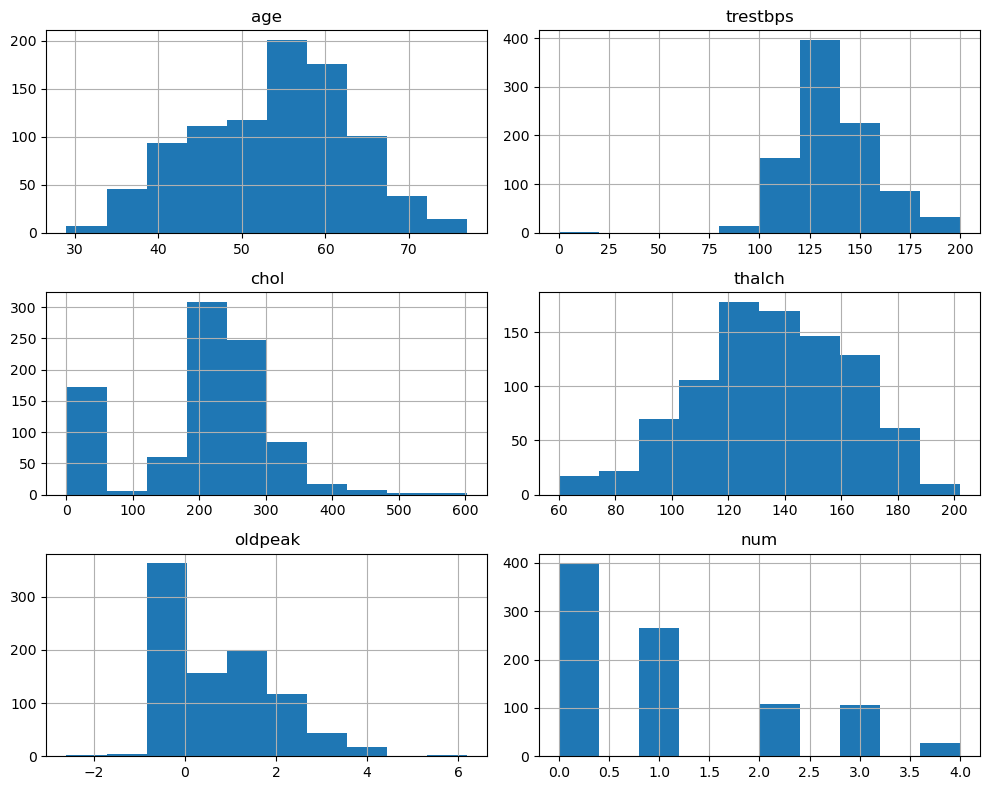

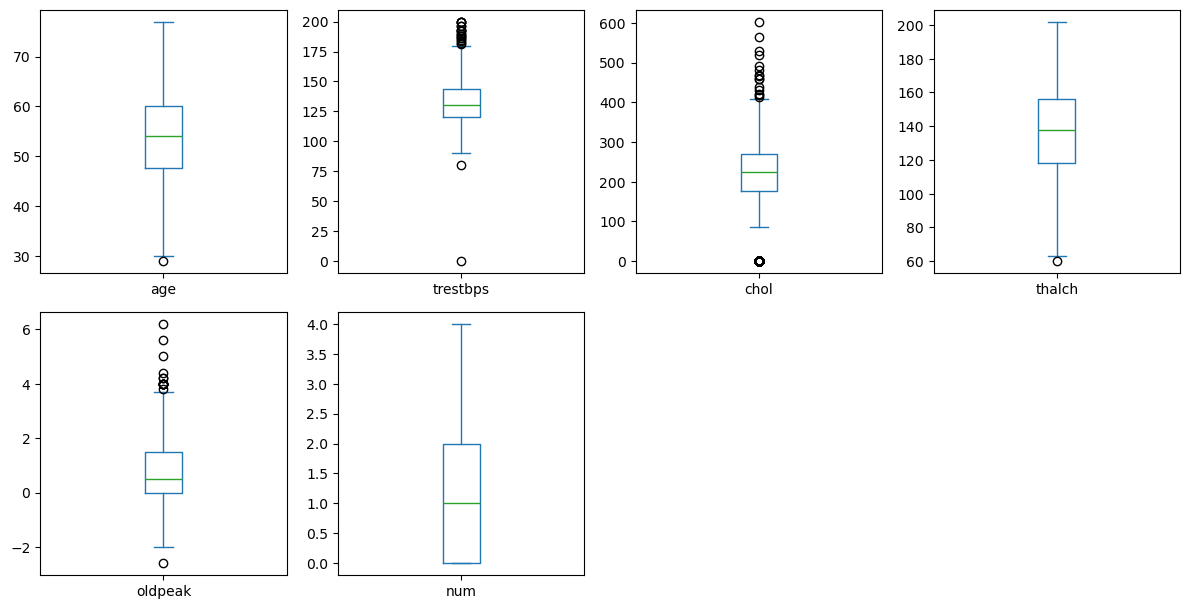

In [19]:
# Filter only numerical columns for histogram plotting
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Check if numerical columns exist before plotting
if len(numerical_columns) > 0:
    data[numerical_columns].hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for plotting histograms.")

# Box plots for numerical features
if len(numerical_columns) > 0:
    data[numerical_columns].plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for plotting box plots.")

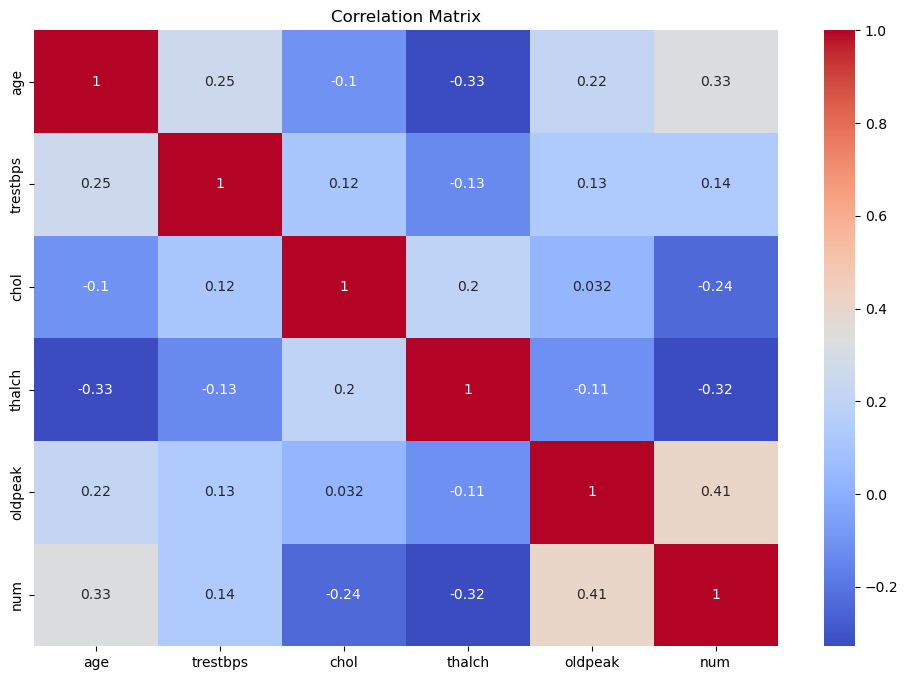

In [20]:
# Select only numerical columns for correlation matrix
if len(numerical_columns) > 0:
    corr_matrix = data[numerical_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

In [21]:
# Task 3: Feature Engineering
# Handling categorical variables using OneHotEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns)

# Handle missing values if any (here we drop rows with missing values)
data = data.dropna()

# Split the data into features and target (assuming the target variable is 'num')
X = data.drop('num', axis=1)
y = data['num']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.00602683,  0.56739446,  0.28129674, ...,  2.03938493,
        -0.85992069, -0.784639  ],
       [-1.39756029,  0.07696688,  0.01352615, ...,  2.03938493,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.32218067, -0.0846564 , ...,  2.03938493,
        -0.85992069, -0.784639  ],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ..., -0.49034392,
         1.16289793, -0.784639  ],
       [ 0.24124911,  0.5183517 ,  0.05815458, ...,  2.03938493,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.42026619,  0.67402693, ..., -0.49034392,
        -0.85992069,  1.27447144]])

In [23]:
features= data.drop('num',axis=1)
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_False,exang_True,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203,132,0.0,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192,148,0.4,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186,190,0.0,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201,126,1.5,False,True,True,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,False,True,True,False,False,...,False,True,False,False,False,False,True,False,False,True
904,62,166,170,120,3.0,False,True,True,False,False,...,True,False,True,False,False,True,False,False,False,True
905,56,170,0,123,2.5,False,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
906,56,144,208,105,0.5,False,True,False,False,True,...,True,False,False,True,True,False,False,True,False,False


In [24]:
target= data[['num']]

In [25]:
features= pd.get_dummies(features,dtype=int)
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_False,exang_True,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203,132,0.0,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192,148,0.4,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186,190,0.0,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201,126,1.5,False,True,True,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,False,True,True,False,False,...,False,True,False,False,False,False,True,False,False,True
904,62,166,170,120,3.0,False,True,True,False,False,...,True,False,True,False,False,True,False,False,False,True
905,56,170,0,123,2.5,False,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
906,56,144,208,105,0.5,False,True,False,False,True,...,True,False,False,True,True,False,False,True,False,False


In [48]:
# Task 4: Decision Tree Classification
# Split the data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(     age  trestbps  chol  thalch  oldpeak  sex_Female  sex_Male  \
 84    42       120   295     162      0.0       False      True   
 10    30       170   237     170      0.0        True     False   
 617   74       140   237      94      0.0       False      True   
 250   41       104     0     111      0.0       False      True   
 869   49       137   142      68      0.5       False      True   
 ..   ...       ...   ...     ...      ...         ...       ...   
 106   63       135   252     172      0.0        True     False   
 270   37       120   260     130      0.0        True     False   
 860   48       140   374     159      1.5       False      True   
 435   57       154   232     164      0.0       False      True   
 102   60       150   240     171      0.9        True     False   
 
      cp_asymptomatic  cp_atypical angina  cp_non-anginal  ...  \
 84             False                True           False  ...   
 10             False               False         

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 25)
(726, 1)
(182, 25)
(182, 1)


In [28]:
# Initialize Decision Tree Classifier
dec_tree= DecisionTreeClassifier()

In [29]:
# Task 5: Hyperparameter Tuning
# Define hyperparameters to tune
params= {'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

In [30]:
# Initialize GridSearchCV
grid_search_params= GridSearchCV(dec_tree, param_grid=params, verbose=2, error_score='raise')
grid_search_params

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [31]:
# Perform hyperparameter tuning
grid_search_params.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [47]:
# Best parameters and score
print("\nBest Hyperparameters:", grid_search_params.best_params_)
print("Best Accuracy after Tuning:", grid_search_params.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Best Accuracy after Tuning: 0.5523287671232876


In [33]:
dec_tree_params= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4)
dec_tree_params

DecisionTreeClassifier(max_depth=4, splitter='random')

In [34]:
dec_tree_params.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [35]:
y_pred= dec_tree_params.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.5824175824175825

In [37]:
dec_tree_manual= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree_manual

DecisionTreeClassifier(max_depth=3)

In [38]:
dec_tree_manual.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

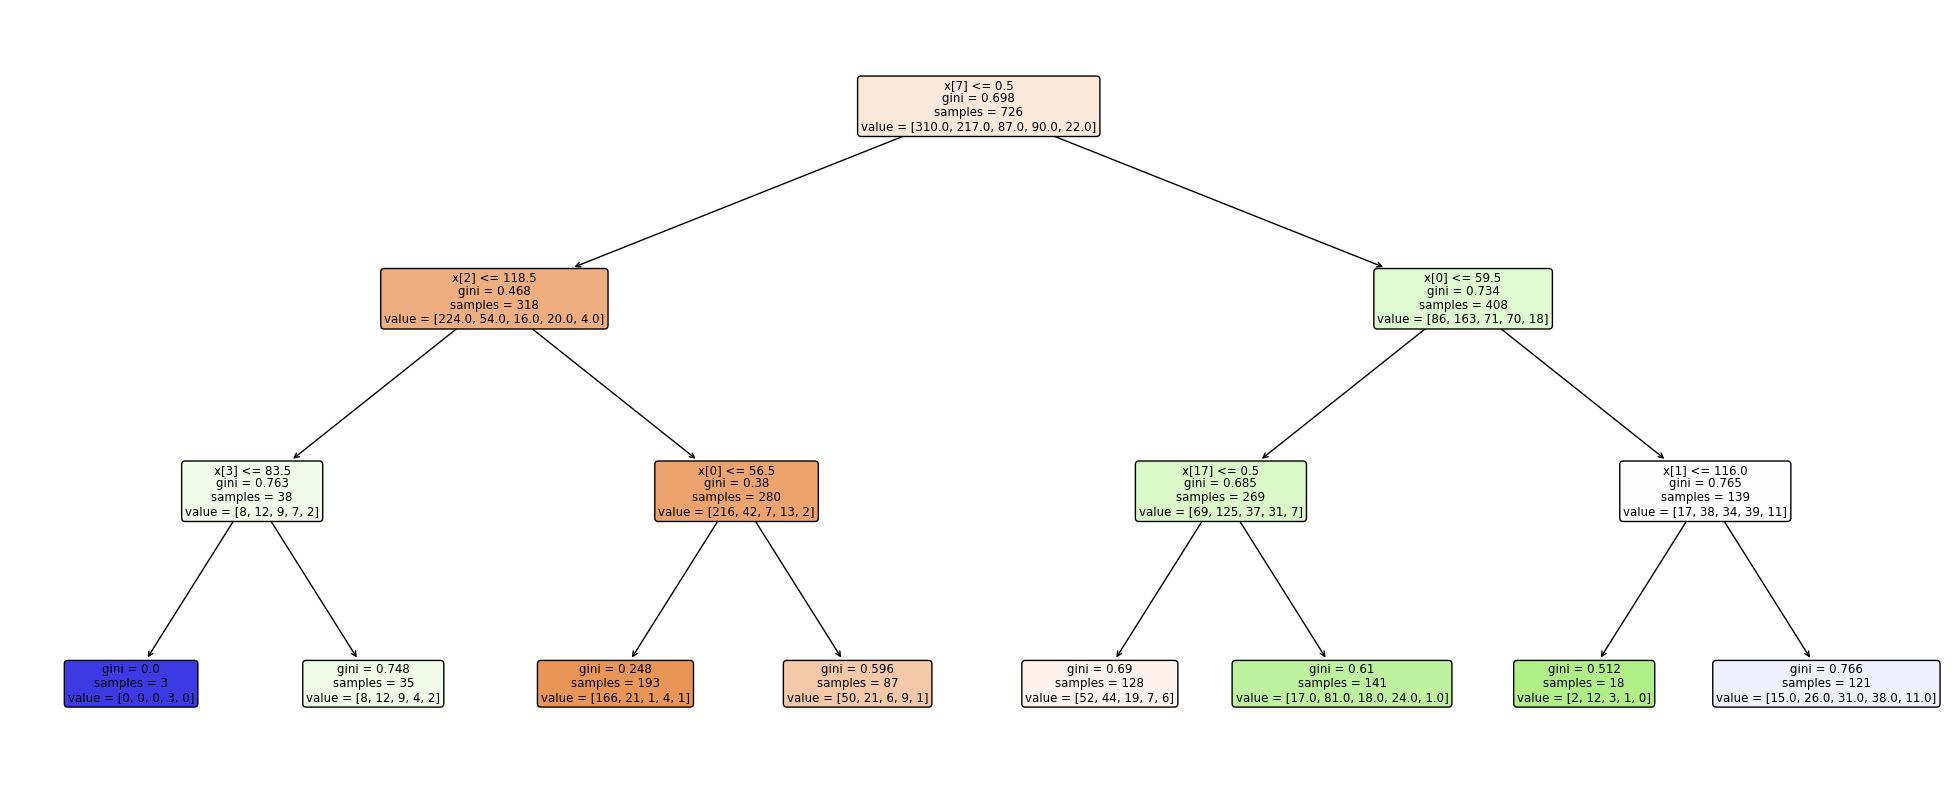

In [39]:
plt.figure(figsize=(25,10))
tree.plot_tree(dec_tree_manual, filled=True, rounded=True);

In [40]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5769230769230769

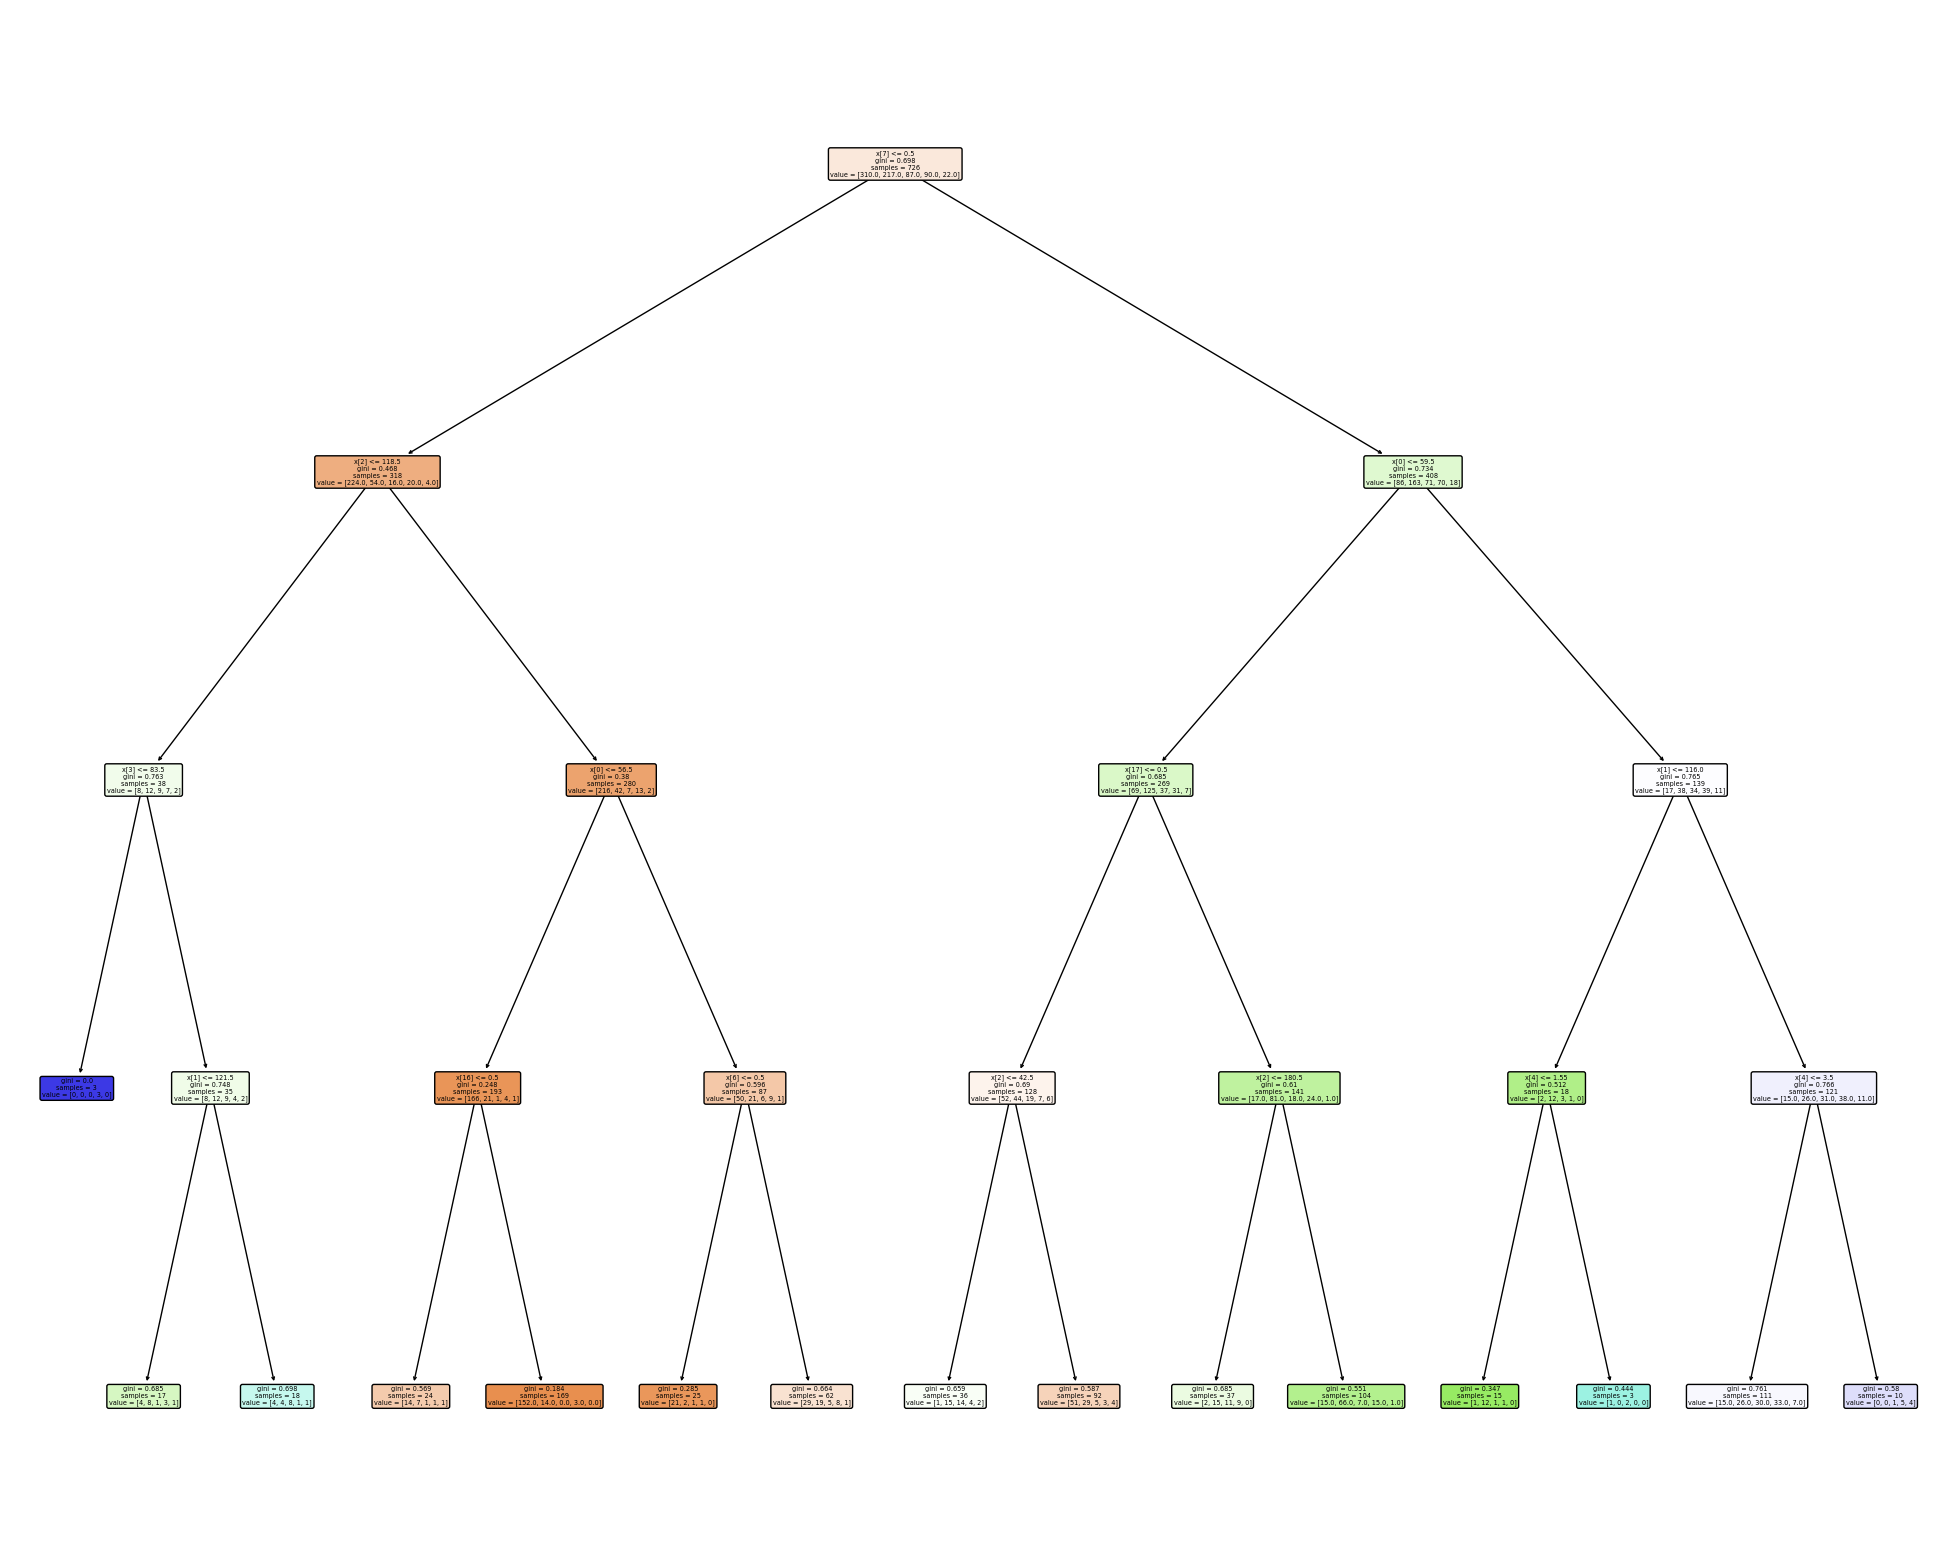

In [41]:
# Visualize the decision tree
plt.figure(figsize=(25,20))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [42]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5769230769230769

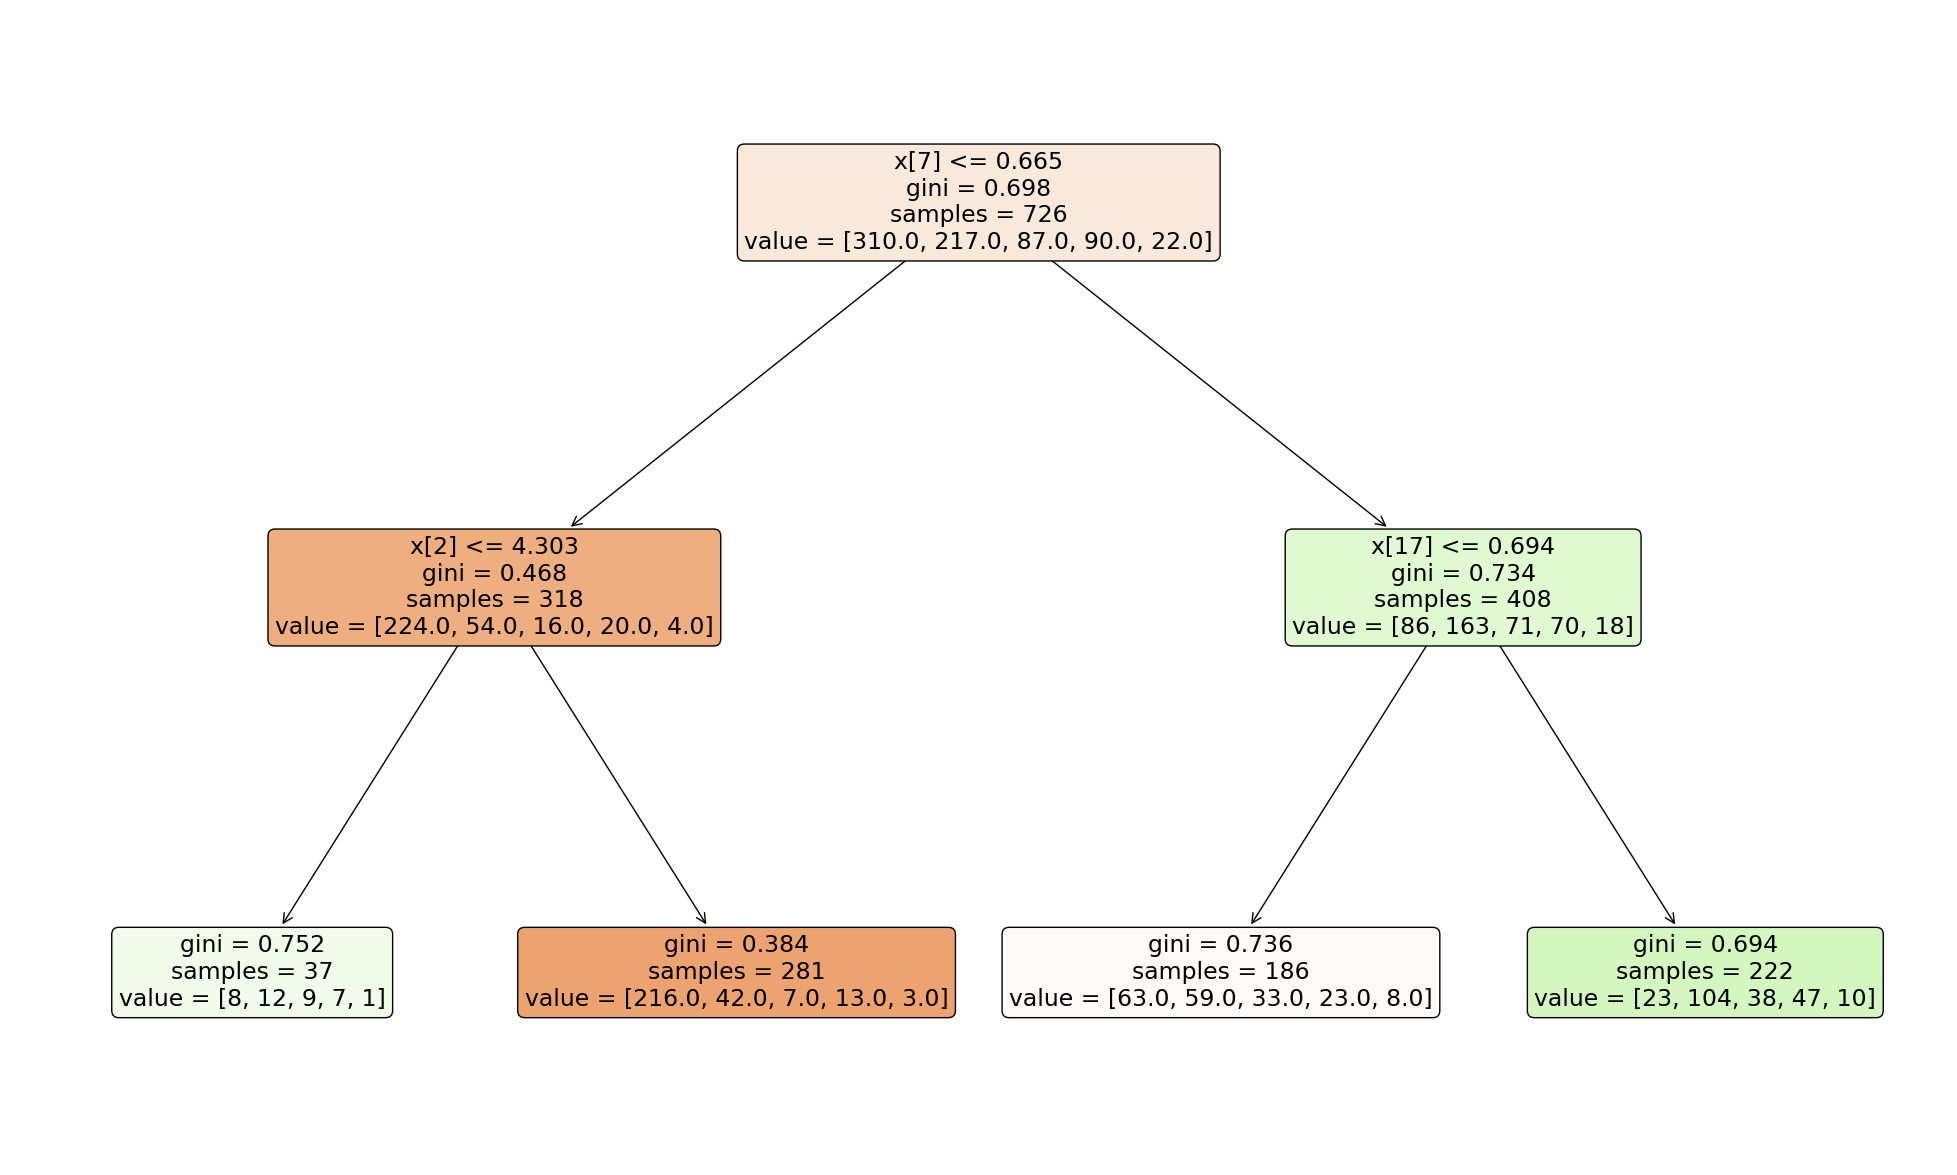

In [43]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [44]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)  

0.5879120879120879

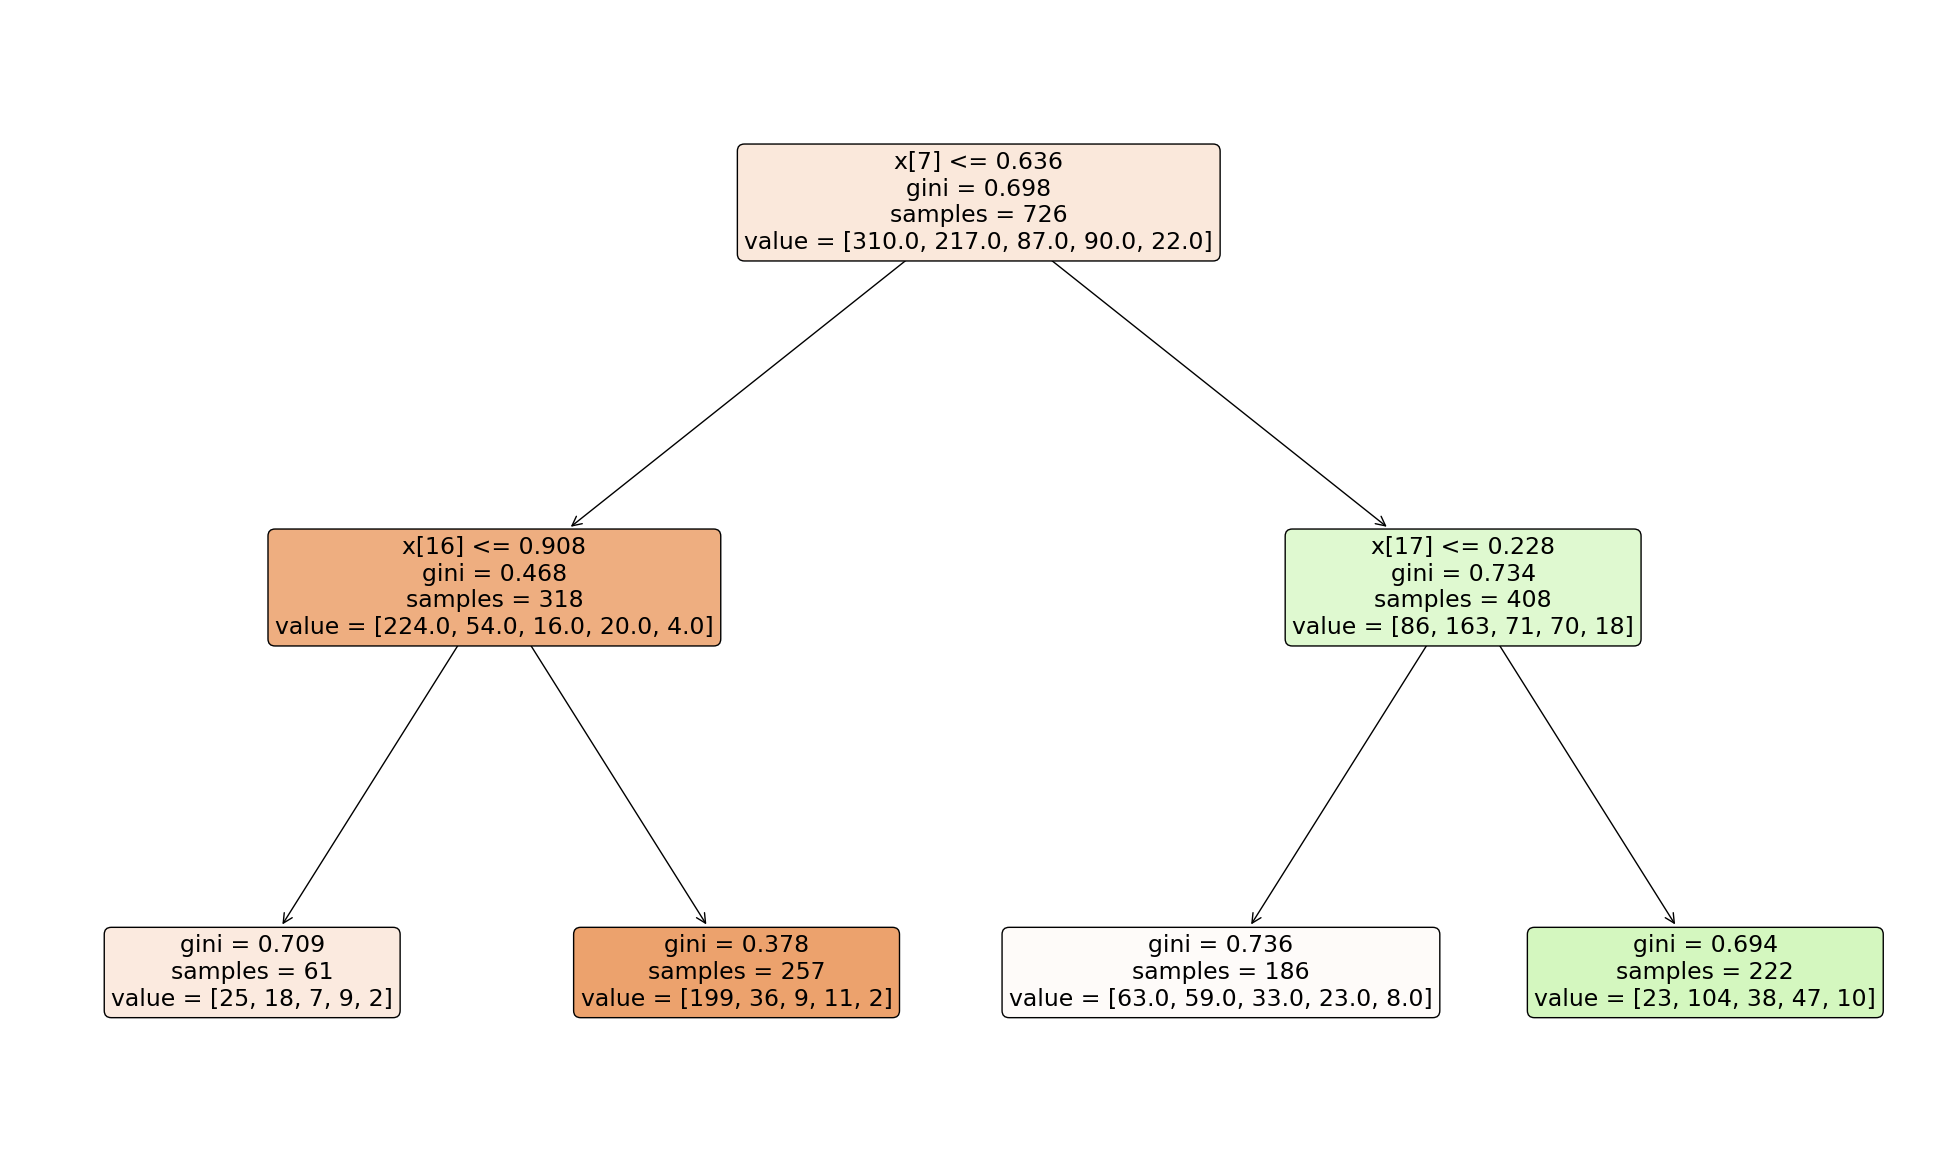

In [45]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182


Confusion Matrix for Tuned Model:
[[76 10  0  3  0]
 [19 24  0  5  0]
 [ 5 12  0  5  0]
 [ 5  8  0  4  0]
 [ 2  2  0  2  0]]

Accuracy Score for Tuned Model: 0.5714285714285714

ROC-AUC Score: 0.6016237090189975


C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

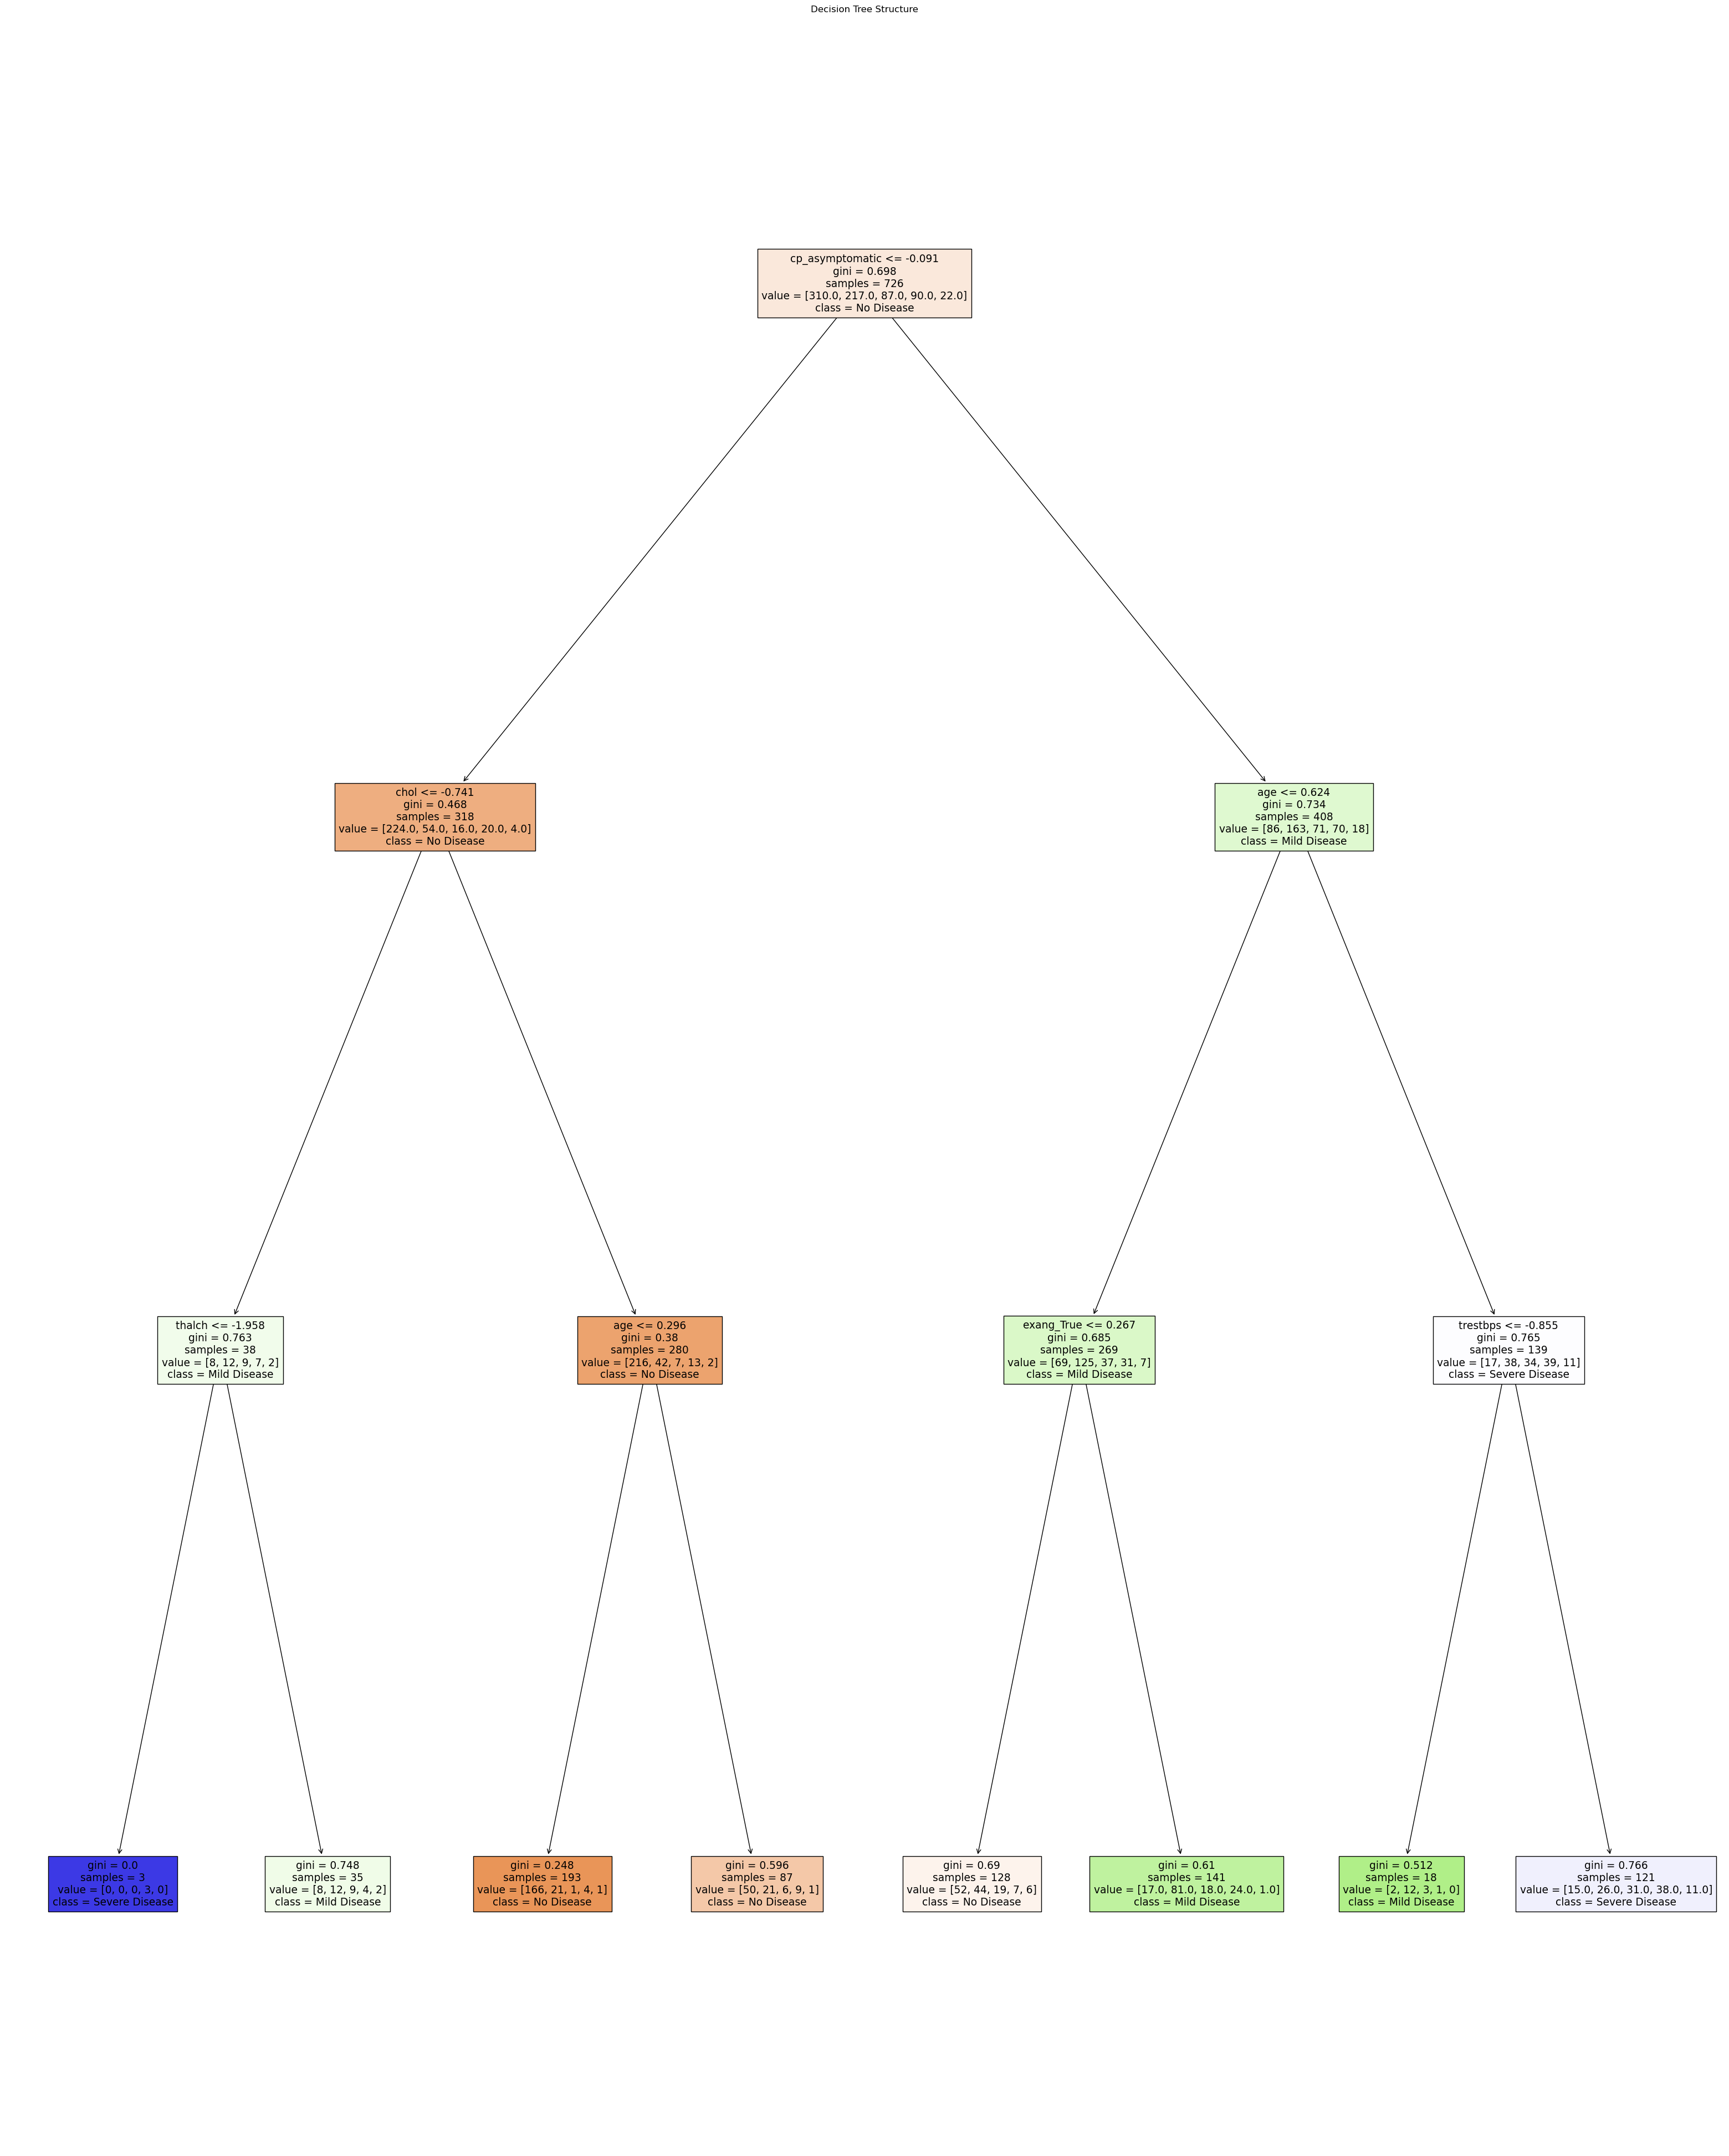

In [46]:
# Task 6: Model Evaluation and Analysis
# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nAccuracy Score for Tuned Model:", accuracy_score(y_test, y_pred_tuned))
# For multiclass problems, specify the multi_class parameter
print("\nROC-AUC Score:", roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr'))

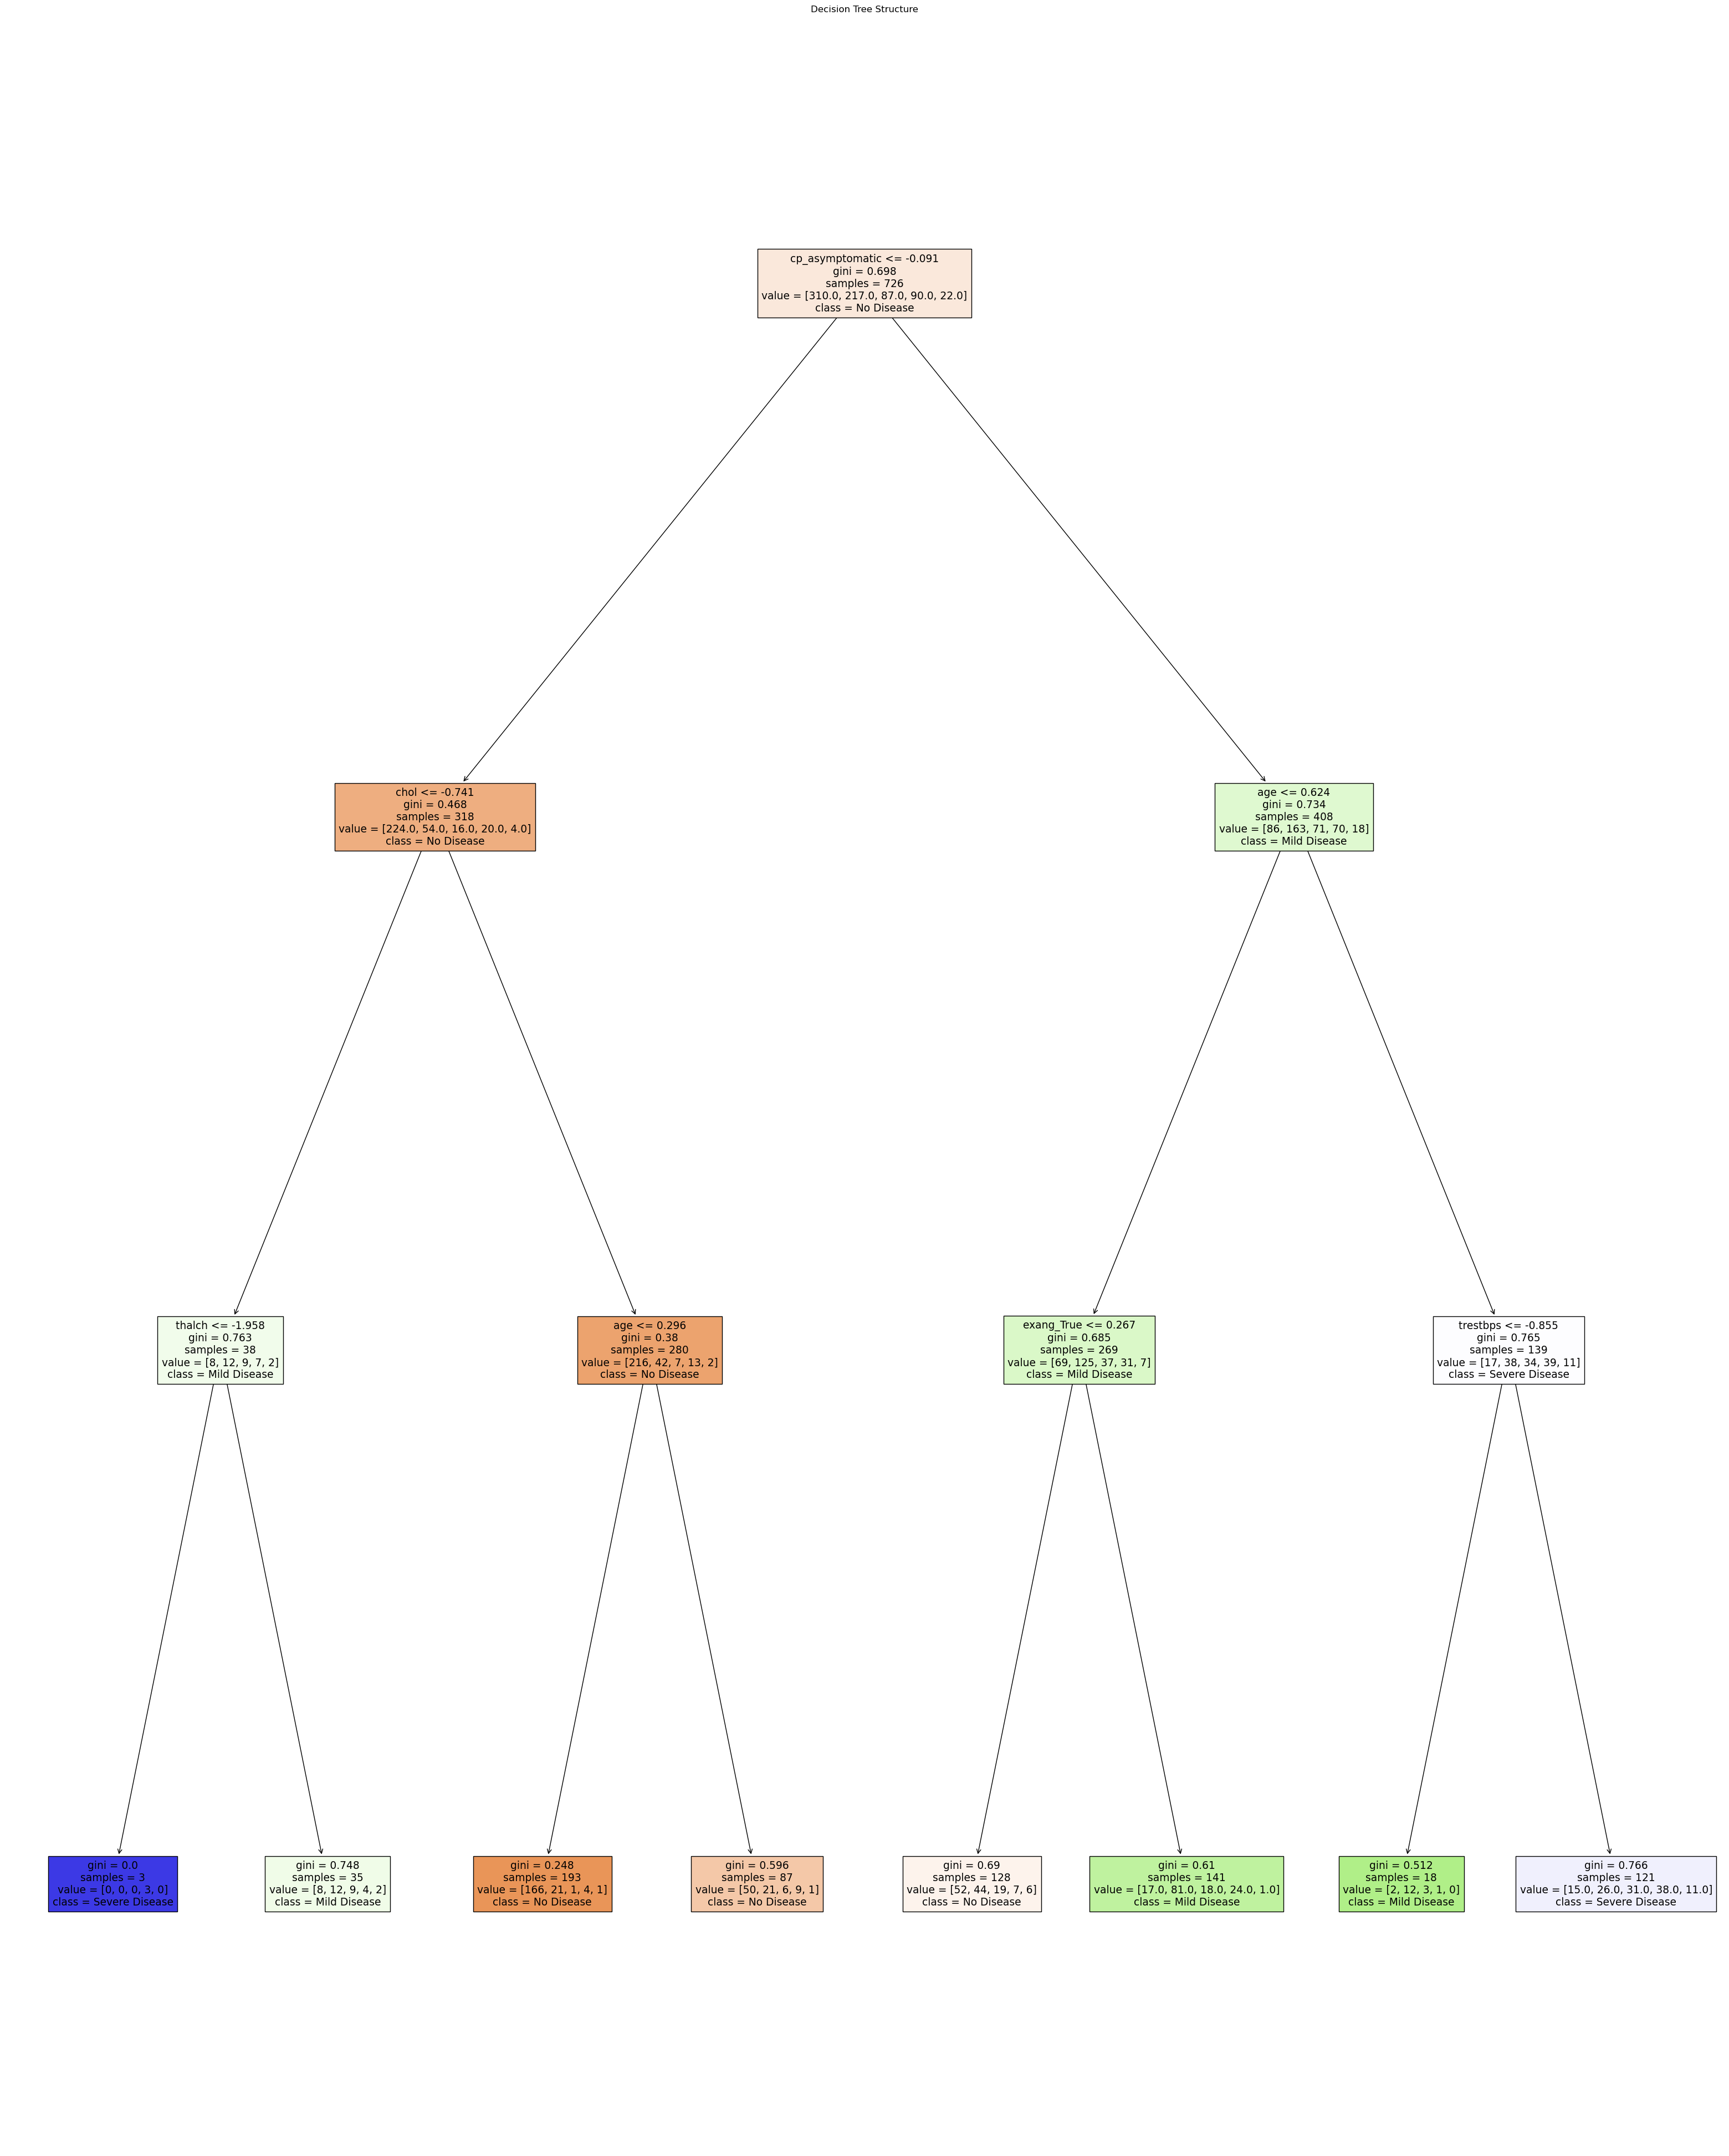

In [49]:
# Visualize the decision tree
plt.figure(figsize=(40, 50))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Mild Disease', 'Moderate Disease', 'Severe Disease', 'Critical Disease'])
plt.title('Decision Tree Structure')
plt.show()

## __INTERVIEW QUESTIONS__